Loading evaluation/batch_backtest_20250712_192926.csv...
72 records loaded.


,ticker,as_of_date,recommendation,reason,explanation,price_change_%
0,AAPL,2025-01-01,SELL,Weighted signals support a SELL with a confide...,**Summary:** I recommend SELLING AAPL at curre...,-3.22
1,AAPL,2025-02-01,HOLD,Signals are mixed; suggesting HOLD with a conf...,**Summary:** Hold onto AAPL for now.\n\n**Reas...,4.39
2,AAPL,2025-03-01,HOLD,Signals are mixed; suggesting HOLD with a conf...,**Summary:** Hold onto your AAPL shares for no...,-6.68
3,AAPL,2025-04-01,HOLD,Signals are mixed; suggesting HOLD with a conf...,**Summary:** HOLD on AAPL for now.\n\n**Reason...,-4.72
4,AAPL,2025-05-01,HOLD,Signals are mixed; suggesting HOLD with a conf...,**Summary:** HOLD AAPL for now.\n\n**Reason:**...,-2.19


       price_change_%
count       72.000000
mean         0.215694
std         10.718000
min        -28.270000
25%         -5.615000
50%         -0.730000
75%          7.732500
max         24.030000
recommendation
HOLD    43
SELL    22
BUY      7
Name: count, dtype: int64


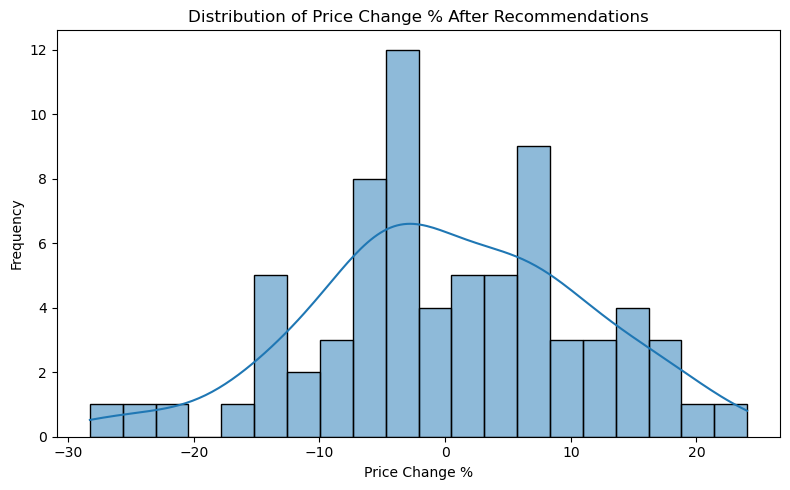

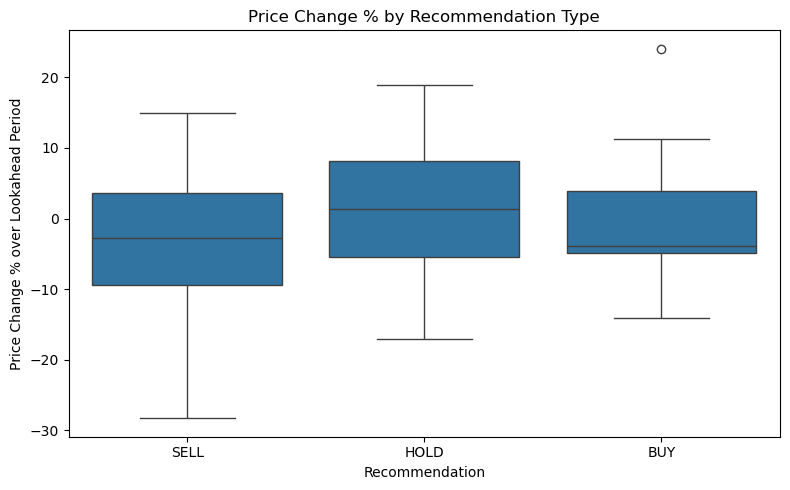

BUY signal accuracy: 28.57% (2/7)
Processed evaluation summary saved to evaluation/processed_evaluation_summary.csv


In [1]:
# evaluation.ipynb (cell 1)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# === Configuration ===
eval_dir = Path("evaluation")
latest_file = max(eval_dir.glob("batch_backtest_*.csv"), key=lambda f: f.stat().st_mtime)
print(f"Loading {latest_file}...")

# === Load CSV ===
df = pd.read_csv(latest_file)
print(f"{len(df)} records loaded.")
display(df.head())

# === Descriptive statistics ===
print(df.describe())
print(df['recommendation'].value_counts())

# === Histogram: Price Change % ===
plt.figure(figsize=(8,5))
sns.histplot(df['price_change_%'].dropna(), bins=20, kde=True)
plt.title('Distribution of Price Change % After Recommendations')
plt.xlabel('Price Change %')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# === Boxplot: Recommendation vs Price Change % ===
plt.figure(figsize=(8,5))
sns.boxplot(x='recommendation', y='price_change_%', data=df)
plt.title('Price Change % by Recommendation Type')
plt.ylabel('Price Change % over Lookahead Period')
plt.xlabel('Recommendation')
plt.tight_layout()
plt.show()

# === BUY signal effectiveness ===
buy_signals = df[df['recommendation'] == 'BUY']
buy_positive = buy_signals[buy_signals['price_change_%'] > 0]
if len(buy_signals) > 0:
    buy_accuracy = len(buy_positive) / len(buy_signals) * 100
    print(f"BUY signal accuracy: {buy_accuracy:.2f}% ({len(buy_positive)}/{len(buy_signals)})")
else:
    print("No BUY signals to evaluate.")

# === Save processed summary ===
df.to_csv(eval_dir / 'processed_evaluation_summary.csv', index=False)
print(f"Processed evaluation summary saved to {eval_dir / 'processed_evaluation_summary.csv'}")
